In [13]:
import sys
import os
from deepface import DeepFace
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
print(sys.version)
print(np.__version__)
print(tf.__version__)

3.10.15 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:19) [MSC v.1929 64 bit (AMD64)]
1.26.4
2.10.1


extracting faces...
100.000%

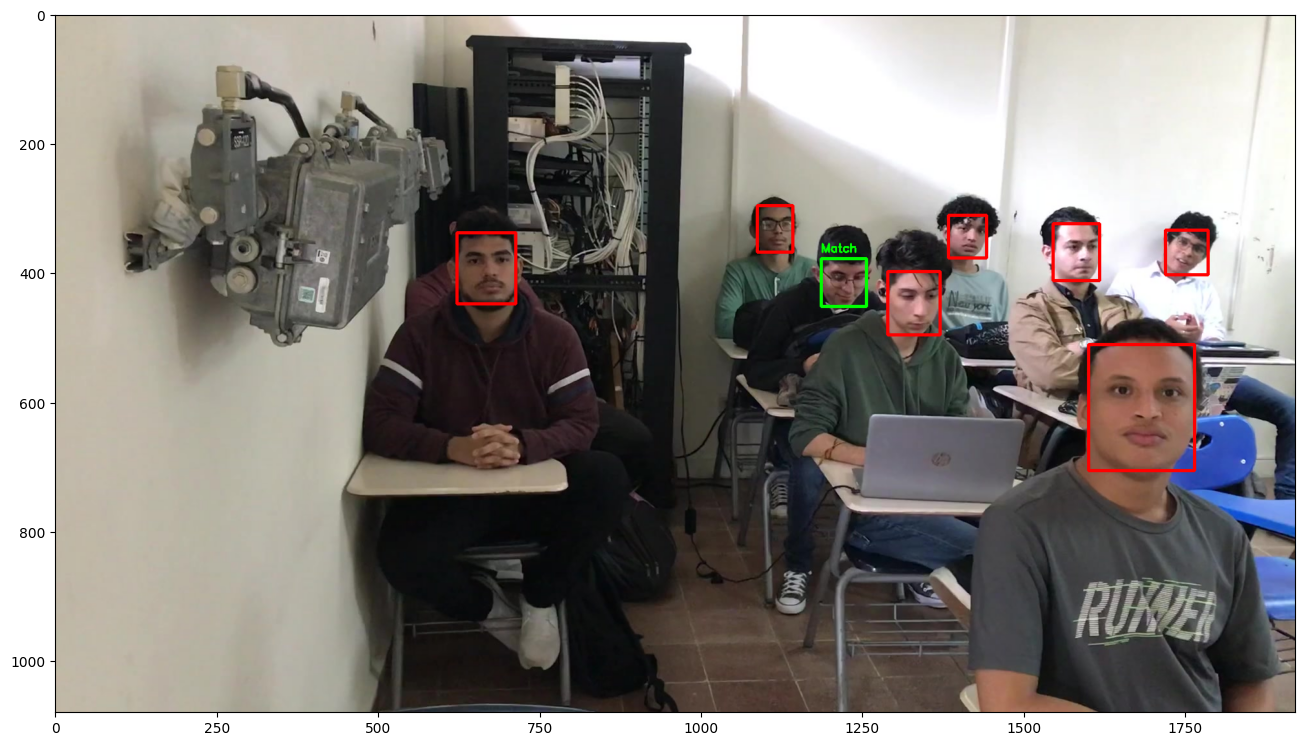

Index: 2 Distance: 0.3411 Threshold: 0.49 Metric: cosine
Index: 7 Distance: 0.6010 Threshold: 0.49 Metric: cosine
Index: 5 Distance: 0.6246 Threshold: 0.49 Metric: cosine
Index: 1 Distance: 0.6873 Threshold: 0.49 Metric: cosine
Index: 0 Distance: 0.6972 Threshold: 0.49 Metric: cosine
Index: 4 Distance: 0.7394 Threshold: 0.49 Metric: cosine
Index: 6 Distance: 0.7584 Threshold: 0.49 Metric: cosine
Index: 3 Distance: 0.7658 Threshold: 0.49 Metric: cosine


In [23]:
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["Facenet", "Facenet512", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace","GhostFaceNet"]

#ruta de la imagen original y del rostro objetivo (face_target)
image_path = "./data/classroom/test/vd/frame-002.jpg"
face_target_path = "./data/classroom/ref/delatorre-pedro/img-00.png"

# Cargar la imagen original
image = cv2.imread(image_path)

# Extraer los rostros de la imagen original
print("extracting faces...")
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)

# Extraer el rostro objetivo (face_target) de la imagen de referencia
target_face_data = DeepFace.extract_faces(img_path=face_target_path, detector_backend='retinaface', enforce_detection=True)

# Inicializar la lista para almacenar los resultados
results = []

# Asegurarse de que se detectó el rostro objetivo
if len(target_face_data) > 0:
    target_face = target_face_data[0]['face']  # Obtener el rostro objetivo

    R1, G1, B1 = target_face.T
    __bgr_target_face = np.array((B1, G1, R1)).T
    bgr_target_face = (__bgr_target_face*255).astype(np.uint8)

    total_faces:int = len(faces)
    i:int = 0
    #iterar sobre cada rostro detectado en la imagen
    for face_data in faces:

        loading = str.format("{0:.3f}", ((i+0.0)/(0.0+total_faces-1.0))*100.0)
        print("\r" + loading + "%", end="")
        
        facial_area = face_data['facial_area']  #Obtener el area facial (bounding box)
        face = face_data['face']  #Obtener el rostro extraido

        R, G, B = face.T
        __bgr_face = np.array((B, G, R)).T
        bgr_face = (__bgr_face*255).astype(np.uint8)
        
        # Realizar la comparación (verificación) entre el rostro detectado y el rostro objetivo
        result = DeepFace.verify(
            img1_path=bgr_target_face,
            img2_path=bgr_face,
            detector_backend="skip",  #omitir la deteccion ya que estan los rostros
            model_name="Facenet512",
            distance_metric="cosine",
            threshold=0.49,
            enforce_detection=True
        )

        results.append([i, result['distance'], result['threshold'], 'cosine'])
        
        #si coinciden (verified=True), dibujar un rectángulo verde, sino, dibujar uno rojo
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        if result['verified']:
            color = (0, 255, 0)  # Verde
            #print(result)
            label = "Match"
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
        else:
            color = (0, 0, 255)  # Rojo
        
        #dibujar el rectangulo en la imagen original
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 4)
        i += 1

    results.sort(key=lambda x: x[1])
    
    #convertir la imagen de BGR a RGB para visualizarla con Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Mostrar la imagen con los recuadros
    plt.figure(figsize=(16, 16))
    plt.imshow(image_rgb)
    plt.axis(True)
    plt.show()
    
    for res in results:
        print(f"Index: {res[0]} Distance: {res[1]:.4f} Threshold: {res[2]} Metric: {res[3]}")
    

else:
    print("The target face was not detected.")

In [ ]:
# Definir métricas y modelos
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["Facenet", "Facenet512", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet"]

# Rutas de la imagen de prueba y del directorio de referencia
image_path = "./data/classroom/test/vd/frame-011.jpg"
reference_dir = "./data/classroom/ref/"

# Cargar la imagen original
image = cv2.imread(image_path)

# Extraer los rostros de la imagen original
print("extracting faces...")
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)

# Inicializar lista para almacenar los resultados
results = []

# Iterar sobre los subdirectorios de personas en el directorio de referencia
for person_name in os.listdir(reference_dir):
    person_path = os.path.join(reference_dir, person_name)
    
    # Solo procesar si es un directorio
    if os.path.isdir(person_path):
        # Buscar una imagen de referencia, por ejemplo, img-00.jpg
        face_target_path = os.path.join(person_path, "img-00.jpg")
        
        if os.path.exists(face_target_path):
            # Extraer el rostro objetivo (face_target)
            target_face_data = DeepFace.extract_faces(img_path=face_target_path, detector_backend='retinaface', enforce_detection=True)
            
            # Asegurarse de que se detectó el rostro objetivo
            if len(target_face_data) > 0:
                target_face = target_face_data[0]['face']

                R1, G1, B1 = target_face.T
                __bgr_target_face = np.array((B1, G1, R1)).T
                bgr_target_face = (__bgr_target_face * 255).astype(np.uint8)

                total_faces = len(faces)
                for i, face_data in enumerate(faces):
                    loading = str.format("{0:.3f}", ((i + 0.0) / (0.0 + total_faces - 1.0)) * 100.0)
                    print("\r" + loading + "%", end="")

                    facial_area = face_data['facial_area']
                    face = face_data['face']

                    R, G, B = face.T
                    __bgr_face = np.array((B, G, R)).T
                    bgr_face = (__bgr_face * 255).astype(np.uint8)

                    # Comparar el rostro detectado con el rostro objetivo
                    result = DeepFace.verify(
                        img1_path=bgr_target_face,
                        img2_path=bgr_face,
                        detector_backend="skip",
                        model_name="Facenet512",
                        distance_metric="cosine",
                        threshold=0.49,
                        enforce_detection=True
                    )

                    results.append([i, result['distance'], result['threshold'], 'cosine'])

                    # Color según coincidencia
                    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
                    if result['verified']:
                        color = (0, 255, 0)  # Verde
                        label = person_name  # Usar el nombre del subdirectorio como etiqueta
                        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                    else:
                        color = (0, 0, 255)  # Rojo
                    
                    # Dibujar rectángulo en imagen original
                    cv2.rectangle(image, (x, y), (x + w, y + h), color, 4)

    # Convertir la imagen de BGR a RGB para visualizarla con Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis(False)
    plt.show()

    # Imprimir resultados
    for res in results:
        print(f"Index: {res[0]} Distance: {res[1]:.4f} Threshold: {res[2]} Metric: {res[3]}")

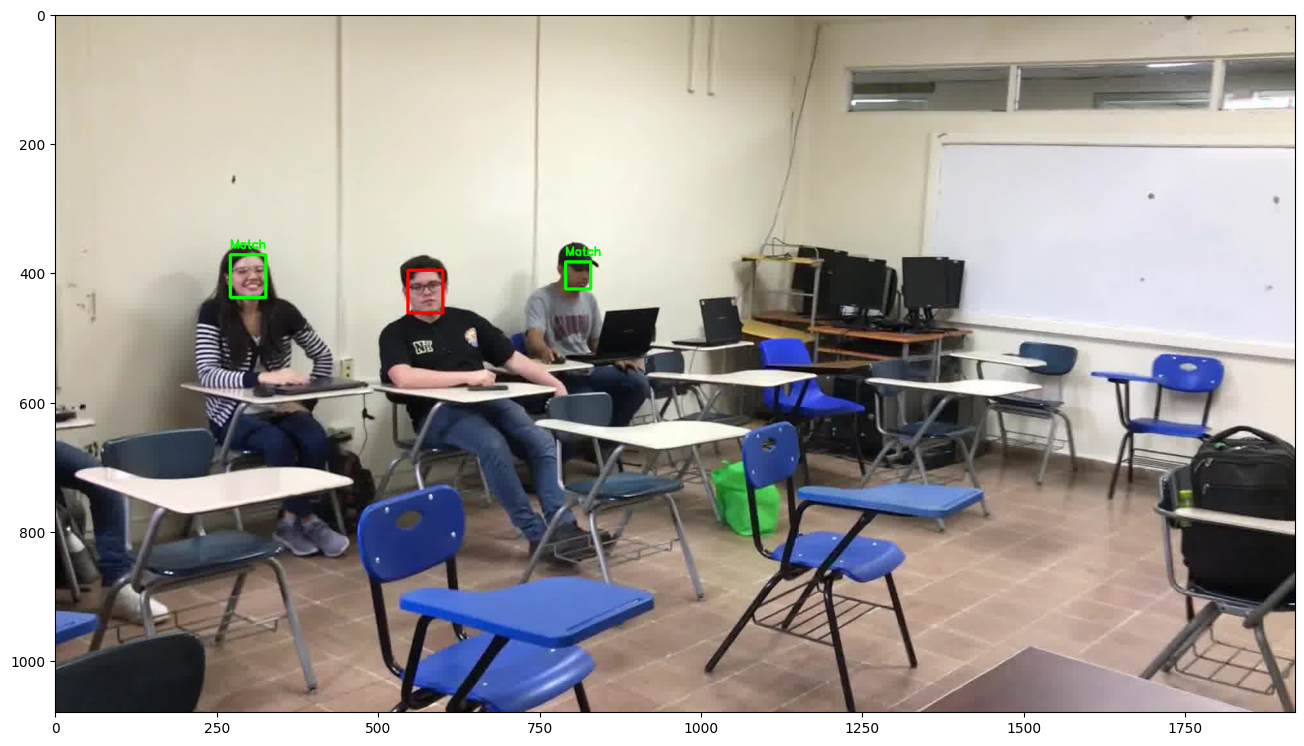

In [19]:
plt.figure(figsize=(16, 16))
plt.imshow(image_rgb)
plt.axis(True)
plt.show()

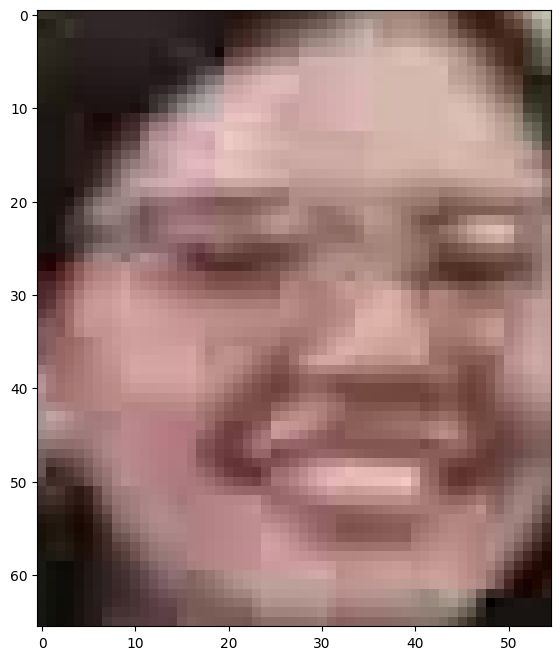

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(faces[1]['face'])
plt.axis(True)
plt.show()